# January Week-on-week view - Persone

Objetivo é analisar a evolução dos consultores durante um período de tempo (semana)

In [77]:
import pandas as pd
import matplotlib as plt


In [78]:
# Carregando dados da base em json
df = pd.read_json('bases/february_base.json')
df['Data Do Pedido'] = pd.to_datetime(df['Data Do Pedido'])

In [ ]:
# Filtrando apenas o mês de Janeiro
jan = df[df['Data Do Pedido'].dt.month == 1]


In [80]:
# Filtrando apenas os pedidos aprovados
jan = jan[jan['Status Do Pedido'] == 'approved']

In [81]:
# Definindo equipes: Agrupando agentes por equipe em arrays
equipe_m = ['Matteo Creso Di Iorio Martinelli', 'Fellipe Santamarca Galvão', 'Greice Freitas', 'Celeste Ferraz Balhesteros']
equipe_t = ['Alicia Souza da Silva', 'Caroline Pereira', 'Fabricia Paula', 'Maria Aparecida Costa Pereira Rodrigues']

In [82]:
# Filtrando vendas por equipe
janManha = jan[jan['Nome Do Agente'].isin(equipe_m)]
janTarde = jan[jan['Nome Do Agente'].isin(equipe_t)]


In [83]:
# Definindo Período: Semana x Semana
semana1 = ['2025-01-01', '2025-01-04']
semana2 = ['2025-01-06', '2025-01-11']
semana3 = ['2025-01-13', '2025-01-18']
semana4 = ['2025-01-20', '2025-01-25']
semana5 = ['2025-01-27', '2025-01-31']
 

In [84]:
# Filtrando resultados por equipe - Semana x Semana

# Equipe manha 
manha_semana1 = janManha[(janManha['Data Do Pedido'] >= semana1[0]) & (janManha['Data Do Pedido'] <= semana1[1])]
manha_semana2 = janManha[(janManha['Data Do Pedido'] >= semana2[0]) & (janManha['Data Do Pedido'] <= semana2[1])]
manha_semana3 = janManha[(janManha['Data Do Pedido'] >= semana3[0]) & (janManha['Data Do Pedido'] <= semana3[1])]
manha_semana4 = janManha[(janManha['Data Do Pedido'] >= semana4[0]) & (janManha['Data Do Pedido'] <= semana4[1])]
manha_semana5 = janManha[(janManha['Data Do Pedido'] >= semana5[0]) & (janManha['Data Do Pedido'] <= semana5[1])]

# Equipe tarde
tarde_semana1 = janTarde[(janTarde['Data Do Pedido'] >= semana1[0]) & (janTarde['Data Do Pedido'] <= semana1[1])]
tarde_semana2 = janTarde[(janTarde['Data Do Pedido'] >= semana2[0]) & (janTarde['Data Do Pedido'] <= semana2[1])]
tarde_semana3 = janTarde[(janTarde['Data Do Pedido'] >= semana3[0]) & (janTarde['Data Do Pedido'] <= semana3[1])]
tarde_semana4 = janTarde[(janTarde['Data Do Pedido'] >= semana4[0]) & (janTarde['Data Do Pedido'] <= semana4[1])]
tarde_semana5 = janTarde[(janTarde['Data Do Pedido'] >= semana5[0]) & (janTarde['Data Do Pedido'] <= semana5[1])]



In [85]:
# Criando séries com resultados semanais

dfManha_semana1 = manha_semana1['Nome Do Agente'].value_counts()
dfManha_semana2 = manha_semana2['Nome Do Agente'].value_counts()
dfManha_semana3 = manha_semana3['Nome Do Agente'].value_counts()
dfManha_semana4 = manha_semana4['Nome Do Agente'].value_counts()
dfManha_semana5 = manha_semana5['Nome Do Agente'].value_counts()


dfTarde_semana1 = tarde_semana1['Nome Do Agente'].value_counts()
dfTarde_semana2 = tarde_semana2['Nome Do Agente'].value_counts()
dfTarde_semana3 = tarde_semana3['Nome Do Agente'].value_counts()
dfTarde_semana4 = tarde_semana4['Nome Do Agente'].value_counts()
dfTarde_semana5 = tarde_semana5['Nome Do Agente'].value_counts()




In [86]:
# Concatenando resultados semanais em novo df

dfManha_semanal = pd.concat([dfManha_semana1, dfManha_semana2, dfManha_semana3, dfManha_semana4, dfManha_semana5], keys=['semana1', 'semana2', 'semana3', 'semana4', 'semana5'], axis=1)
dfTarde_semanal = pd.concat([dfTarde_semana1, dfTarde_semana2, dfTarde_semana3, dfTarde_semana4, dfTarde_semana5], keys=['semana1', 'semana2', 'semana3', 'semana4', 'semana5'], axis=1)

In [87]:
# Transpondo dados para organizar os dataframes

dfManha = dfManha_semanal.T.fillna(0).astype(int)
dfTarde = dfTarde_semanal.T.fillna(0).astype(int)

In [88]:
dfManha

Nome Do Agente,Matteo Creso Di Iorio Martinelli,Fellipe Santamarca Galvão,Celeste Ferraz Balhesteros
semana1,2,2,0
semana2,7,4,0
semana3,16,5,6
semana4,11,5,5
semana5,11,3,5


In [89]:
dfTarde

Nome Do Agente,Alicia Souza da Silva,Maria Aparecida Costa Pereira Rodrigues,Caroline Pereira
semana1,4,3,1
semana2,12,16,10
semana3,6,16,14
semana4,7,3,9
semana5,9,3,5


<Axes: title={'center': 'Vendas por consultor: Semana x Semana'}, xlabel='Semanas', ylabel='Vendas'>

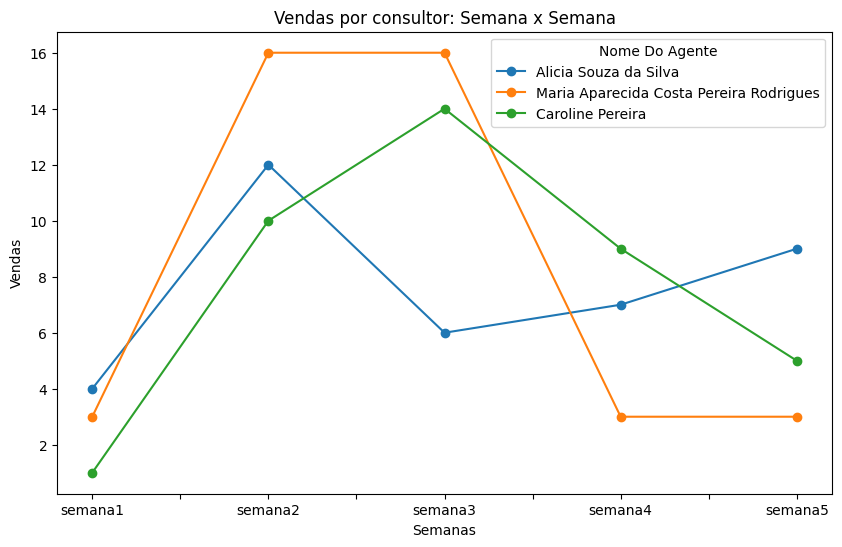

In [90]:
dfTarde.plot(
    kind='line',
    marker='o',  # Adiciona marcador nas linhas
    title='Vendas por consultor: Semana x Semana',
    xlabel='Semanas',
    ylabel='Vendas', 
    figsize=(10, 6)     #Tamanho do gráfico
)

<Axes: title={'center': 'Vendas por consultor: Semana x Semana - Fevereiro'}, xlabel='Semanas', ylabel='Vendas'>

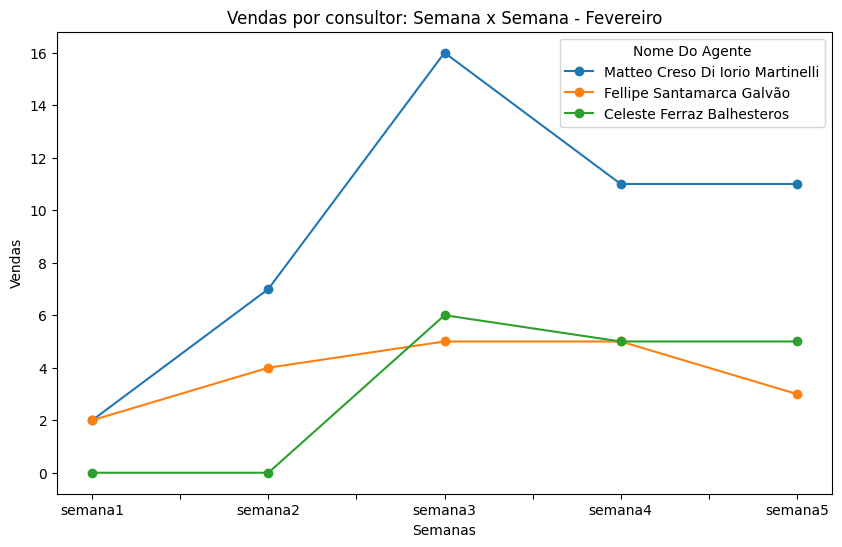

In [91]:
dfManha.plot(
    kind='line',
    marker='o',  # Adiciona marcador nas linhas
    title='Vendas por consultor: Semana x Semana - Fevereiro',
    xlabel='Semanas',
    ylabel='Vendas', 
    figsize=(10, 6)     #Tamanho do gráfico
)